# IMPORTING LIBRARIES

In [87]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# IMPORTING THE DATA

In [68]:
data = pd.read_csv("D:/RKMVERI MSc BDA/SEM 2/ML/ASSIGNMENTS/Assignment 3/data2.csv")
X = np.asarray(data["x"])
y = np.asarray(data["y"])
data.head()

,x,y,labels
0,2.580645,6.361775,1.0
1,2.721774,6.680801,1.0
2,3.084677,7.757514,1.0
3,3.608871,8.275931,1.0
4,3.810484,7.797392,1.0


# Function for preparing the data matrix

In [69]:
def DataMatrix(highest_power):
    data_df = pd.DataFrame(list(np.ones(len(X))))
    for i in range(1,highest_power+1):
        data_df["x"+"^"+str(i)] = np.array(X**i)
    return np.matrix(data_df)

# Function for estimating the parameter

In [71]:
def Parameter_estimation(x,y,Lambda):
    xx = x.T@x
    shape = xx.shape
    penalty = Lambda*np.ones(shape)
    w = np.linalg.inv(xx+penalty)@x.T@y
    return np.array(w).flatten()

# Prediction function

In [72]:
def Prediction(w):
    yy = w@x1.T
    y_pred = np.array(yy).flatten()
    sse = np.sum(np.square(y-y_pred))
    return sse

# Setting the panalty for LASSO 

In [74]:
Lambda = float(input("Choose the value of lambda:"))

Choose the value of lambda:0.9


# Fitting the data by different degree of polynomials and calculating the SSE

In [75]:
SSE = []
for i in range(1,11):
    x1 = DataMatrix(i)
    w1 = Parameter_estimation(x1,y,Lambda)
    SSE.append(Prediction(w1))

# The dataframe showing the SSE corresponding to different degree

In [86]:
Power_of_x = list(range(1,11))
df = pd.DataFrame(SSE,Power_of_x)
df.columns = ["SSE"]
df

,SSE
1,469.591019
2,436.004433
3,400.405923
4,353.569604
5,328.976573
6,324.619431
7,272.811349
8,241.874432
9,215.525300
10,171.933511


# Visualizing the best fitted polynomial

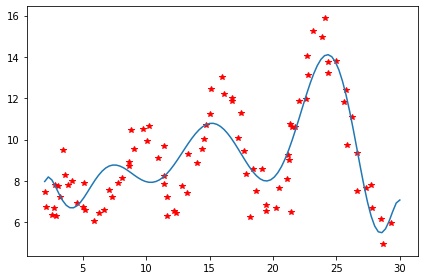

In [78]:
plt.rcParams["figure.autolayout"] = True
plt.plot(X, y, 'r*')
dat = DataMatrix(10)
w_best = Parameter_estimation(dat,y,Lambda)
x_ = np.linspace(2,30,100)
y_ = [0]*100
for i in range(len(x_)):
    a = 0
    for j in range(10+1):
        a = a+ (w_best[j]*(x_[i]**j))
    y_[i] = a
plt.plot(x_, y_)